<a href="https://colab.research.google.com/github/GilbertoRocha/Estudos/blob/master/FormacaoCientistaDadosPythoneR/Python/Series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Séries temporais**

Estuda o comportamento de uma variável continua ao longo do tempo.
Sempre será uma mesma variável, que está relacionada a um intervalo de tempo

A ordem em que os dados são apresentados são importantes na serie temporal

O intervalo de coleta é feita de forma regular.

O intervalo deve ser sempre o mesmo - Unico em toda a série, por exemplo, usar apenas segundos, dias, horas, semanas, meses.

Não deve-se coletar mais de uma amostra a cada intervalo, se isto for necessário, então formar mais de uma linha temporal. Por exemplo, coleta de dados entre fontes diferentes de informação.

Supõe que exista alguma dependência entre os intervalos(autocorrelação), não entre variaveis (como vemos em correlacao), é uma relação ou dependencia na propria variavel, conforme for passando o tempo (intervalo).

**Serie temporal é utilizado para**
 - Explicação / compreensão de caracteristicas importantes
 - Previsão (fazer uma extrapolação)
 - Controle, por exemplo, acompanhar uma linha de produção.

Não se busca relação de causa/efeito diretamente. Por exemplo, no transporte publico, pode-se observar uma série temporal da quantidade de passageiros, aonde pode-se entender algum motivo para um aumento de passageiros, sem que essa informação esteja presente na propria série temporal.

**Aplicações**
  - Econometria
  - Previsão do tempo
  - Previsões financeiras
  - Erupções Vulcanicas

As séries podem ser estacionárias, ou seja flutuam em torno de uma mesma média e variância, ou seja, a média acaba permanecendo praticamente inalterada, mesmo ocorrendo picos e declinios na linha temporál

As séries não estacionarias não respeitam uma média, elas podem subir ou descer muito, puxando a média para cima ou baixo.

As séries podem ser estocáticas, ou seja, tem uma formula que explica uma boa parte da linha, mas tem algum fator aleatório inserido que não pode ser explicado. Esse é a maioria dos casos das séries

As séries podem ser determinísticas, ou seja, explicadas completamente através de uma formula ou função


**Componentes das series temporais**

Valores observados (podem existir na series)
 - Tendência, observa-se uma tendencia de direção da linha temporal
 - Sazonalidade, observa-se os picos (positivos e negativos) da serie temporal
 - Aleatoriedade, são elementos que estão presentes na serie, mas não é possivel explicar ele

Existem graficos que decompõem esses valores, para ficarem mais claros

Existe ainda um fator que não esta relacionado ao intervalo de tempo, chamado de ciclo. Eles tendem a durar mais e com picos maiores que a sazionalidade. Por exemplo, uma crise economica, gera uma baixa na economia, mas não é relacionado ao intervalo de tempo, pois é algo não previsto



In [0]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from io import StringIO
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# simula a carga de um csv
arq = StringIO("""Month,#Passengers
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119
1949-11,104
1949-12,118
1950-01,115
1950-02,126
1950-03,141
1950-04,135
1950-05,125
1950-06,149
1950-07,170
1950-08,170
1950-09,158
1950-10,133
1950-11,114
1950-12,140
1951-01,145
1951-02,150
1951-03,178
1951-04,163
1951-05,172
1951-06,178
1951-07,199
1951-08,199
1951-09,184
1951-10,162
1951-11,146
1951-12,166
1952-01,171
1952-02,180
1952-03,193
1952-04,181
1952-05,183
1952-06,218
1952-07,230
1952-08,242
1952-09,209
1952-10,191
1952-11,172
1952-12,194
1953-01,196
1953-02,196
1953-03,236
1953-04,235
1953-05,229
1953-06,243
1953-07,264
1953-08,272
1953-09,237
1953-10,211
1953-11,180
1953-12,201
1954-01,204
1954-02,188
1954-03,235
1954-04,227
1954-05,234
1954-06,264
1954-07,302
1954-08,293
1954-09,259
1954-10,229
1954-11,203
1954-12,229
1955-01,242
1955-02,233
1955-03,267
1955-04,269
1955-05,270
1955-06,315
1955-07,364
1955-08,347
1955-09,312
1955-10,274
1955-11,237
1955-12,278
1956-01,284
1956-02,277
1956-03,317
1956-04,313
1956-05,318
1956-06,374
1956-07,413
1956-08,405
1956-09,355
1956-10,306
1956-11,271
1956-12,306
1957-01,315
1957-02,301
1957-03,356
1957-04,348
1957-05,355
1957-06,422
1957-07,465
1957-08,467
1957-09,404
1957-10,347
1957-11,305
1957-12,336
1958-01,340
1958-02,318
1958-03,362
1958-04,348
1958-05,363
1958-06,435
1958-07,491
1958-08,505
1958-09,404
1958-10,359
1958-11,310
1958-12,337
1959-01,360
1959-02,342
1959-03,406
1959-04,396
1959-05,420
1959-06,472
1959-07,548
1959-08,559
1959-09,463
1959-10,407
1959-11,362
1959-12,405
1960-01,417
1960-02,391
1960-03,419
1960-04,461
1960-05,472
1960-06,535
1960-07,622
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432""")

base = pd.read_csv(filepath_or_buffer=arq)
base.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
print(base.dtypes)

# transforma a coluna month em um tipo data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

# parse_dates recebe o nome da coluna, que por coincidencia é Month
#base = pd.read_csv(filepath_or_buffer=arq, parse_dates=['Month'], index_col = 'Month', date_parser=dateparse)
#como e simulado a leitura de csv, entao a conversao e feita diferente
base['Month'] = base['Month'].apply(dateparse)
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object
Month          datetime64[ns]
#Passengers             int64
dtype: object


In [4]:
# alterado o index, como é feito um simulado de carga de csv, então isso ficou diferente
# so pode ter uma variavel no df e o indice
base.index = base['Month']
base = base.drop('Month', axis=1)
base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# cria uma variavel do tipo timeseries
ts = base['#Passengers']
type(ts)

pandas.core.series.Series

In [6]:
# verificando os dados

# por index
print('por index')
print(ts[1])
print('-------------------')
# por mes
print('por mes')
print(ts['1949-02'])
print('-------------------')
# usando data
print('usando data')
print(ts[datetime(1949,2,1)])
print('-------------------')
# por intervalo
print('por intervalo')
print(ts['1950-01-01':'1950-07-31'])
print('-------------------')
# por intervalo apenas contendo o final
print('por intervalo apenas contendo o final')
print(ts[:'1950-07-31'])
print('-------------------')
# por ano
print('por ano')
print(ts['1950'])
print('-------------------')

por index
118
-------------------
por mes
Month
1949-02-01    118
Name: #Passengers, dtype: int64
-------------------
usando data
118
-------------------
por intervalo
Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64
-------------------
por intervalo apenas contendo o final
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64
-------------------
por ano
Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    11

In [7]:
# visualizar o indice maior e menor
print(ts.index.max())
print(ts.index.min())

1960-12-01 00:00:00
1949-01-01 00:00:00


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


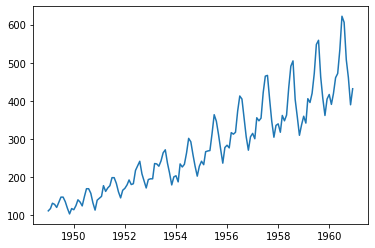

In [8]:
# grafico
plt.plot(ts)
plt.show()

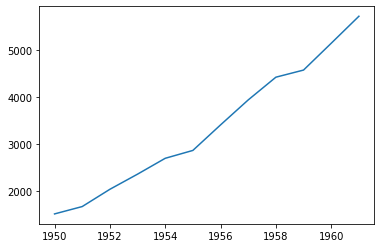

In [9]:
# agrupando por ano ('A')
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)
plt.show()

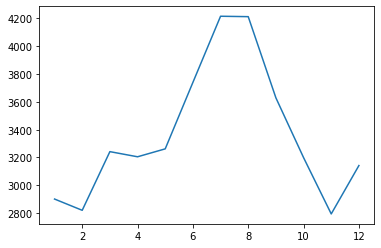

In [10]:
# Agrupando por ano
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)
plt.show()

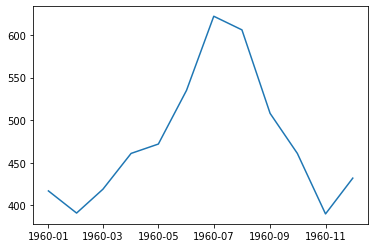

In [11]:
# por datas
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)
plt.show()

**Decompondo a série**

In [12]:
decomposicao = seasonal_decompose(ts)
print(decomposicao)

In [13]:
# tendencia
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: #Passengers, Length: 144, dtype: float64

In [14]:
# sazonalidade
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: #Passengers, Length: 144, dtype: float64

In [15]:
# aleatorio (chamado tambem de residuo)
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: #Passengers, Length: 144, dtype: float64

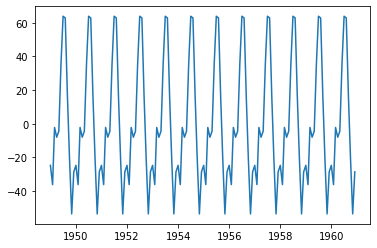

In [16]:
# grafico sazonal
plt.plot(sazonal)
plt.show()

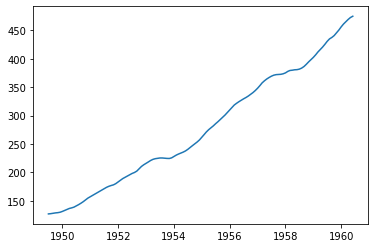

In [17]:
# tendencia
plt.plot(tendencia)
plt.show()

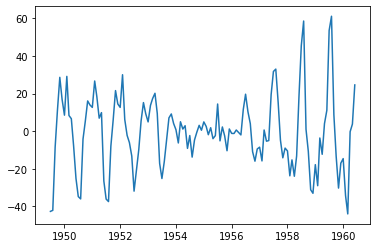

In [18]:
# aleatorio
plt.plot(aleatorio)
plt.show()

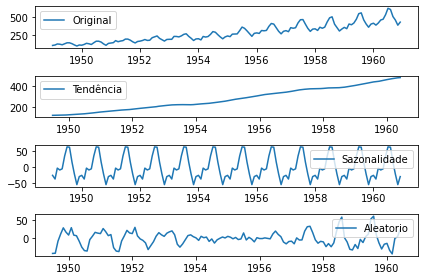

In [19]:
# visualizando tudo junto
plt.subplot(4, 1, 1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(aleatorio, label = 'Aleatorio')
plt.legend(loc = 'best')

# adiciona um layout
plt.tight_layout()
plt.show()